**10/11/2024
Clustring using DBSCAN notebook
Author: Yasmeen**


**DBSCAN will be used on different datasets to identify outliers. this is crucial for data quality improvements and for reducing noise.
In clustering, outliers can distort how clusters are formed.**


**DATASET 1**


**STEP 1: Connecting google drive to google collab**


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**STEP 2: Process will be done on 1_binary , preprocessed version : 1_nrml_b.csv.
This version was chosen beacuse it ensures the features are on a similar scale and DBSCAN clustering relies on distance calculations and normalizing the dataset values in a similar range can improve the performance of the algorithm by preventing features with large scales from dominating.**

In [ ]:
import pandas as pd
file_path = '/content/gdrive/MyDrive/Datasets/1_nrml_b.csv'
file_path = '/content/gdrive/MyDrive/Datasets/2_nrml.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of           Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0    0.322034       0       0.142857     0.428571      0.571429   
1    0.050847       0       0.285714     0.000000      0.571429   
2    0.355932       0       0.428571     0.571429      0.714286   
3    0.389831       0       0.857143     0.857143      0.857143   
4    0.542373       0       0.714286     1.000000      0.857143   
..        ...     ...            ...          ...           ...   
995  0.508475       0       0.714286     0.857143      0.857143   
996  0.389831       1       0.714286     1.000000      0.857143   
997  0.186441       1       0.428571     0.571429      0.714286   
998  0.067797       1       0.714286     1.000000      0.857143   
999  0.559322       0       0.714286     0.571429      0.714286   

     Occupational Hazards  Genetic Risk  Chronic Lung Disease  Balanced Diet  \
0                0.428571      0.333333              0.166667       0.166667   
1                0.285714      0.500000              0.166667       0.166667   
2                0.571429      0.666667              0.500000       0.833333   
3                0.857143      0.833333              1.000000       1.000000   
4                0.857143      1.000000              0.833333       1.000000   
..                    ...           ...                   ...            ...   
995              0.857143      1.000000              0.833333       1.000000   
996              0.857143      1.000000              0.833333       1.000000   
997              0.571429      0.666667              0.500000       0.833333   
998              0.857143      1.000000              0.833333       1.000000   
999              0.571429      0.666667              0.500000       0.833333   

      Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0    0.500000  ...    0.250     0.428571                0.125  0.142857   
1    0.166667  ...    0.000     0.285714                0.750  1.000000   
2    1.000000  ...    0.875     0.857143                1.000  0.142857   
3    1.000000  ...    0.375     0.142857                0.250  0.000000   
4    1.000000  ...    0.250     0.142857                0.375  0.000000   
..        ...  ...      ...          ...                  ...       ...   
995  1.000000  ...    0.500     0.285714                0.125  0.857143   
996  1.000000  ...    1.000     0.714286                0.500  0.857143   
997  1.000000  ...    0.875     0.857143                1.000  0.142857   
998  1.000000  ...    0.250     0.142857                0.375  0.000000   
999  1.000000  ...    0.875     0.857143                1.000  0.142857   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                 0.285714                     0.000       0.166667   
1                 0.714286                     0.125       0.000000   
2                 0.000000                     0.375       0.833333   
3                 0.428571                     0.500       0.833333   
4                 0.428571                     0.125       0.500000   
..                     ...                       ...            ...   
995               1.000000                     0.125       0.500000   
996               0.142857                     0.375       0.333333   
997               0.000000                     0.375       0.833333   
998               0.428571                     0.125       0.500000   
999               0.000000                     0.375       0.833333   

     Dry Cough   Snoring  Level  
0     0.333333  0.500000    0.0  
1     1.000000  0.166667    0.5  
2     1.000000  0.166667    1.0  
3     1.000000  0.666667    1.0  
4     0.166667  0.333333    1.0  
..         ...       ...    ...  
995   0.666667  0.333333    1.0  
996   0.000000  0.500000    1.0  
997   1.000000  0.166667    1.0  
998   0.166667  0.333333    1.0  
999   1.000000  0.166667    1.0  

[1000 rows x 24 columns]>

**In a DBSCAN algorithm, the most important part is to correctly set the values for eps (epsilon) which is the maximum distance between two points for them to be considered in the same neighborhood and min samples which is the minimum number of points required to form a dense region.**

**STEP 3: Find the correct value for the eps parameter by generating a k-distance graph.**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('/content/gdrive/MyDrive/Datasets/1_nrml_b.csv')

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['LUNG_CANCER'], errors='ignore'))

# Use k-nearest neighbors to find distances to the 4th nearest neighbor
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort distances
distances = np.sort(distances[:, 4], axis=0)


**Visualize the K-Distance graph**

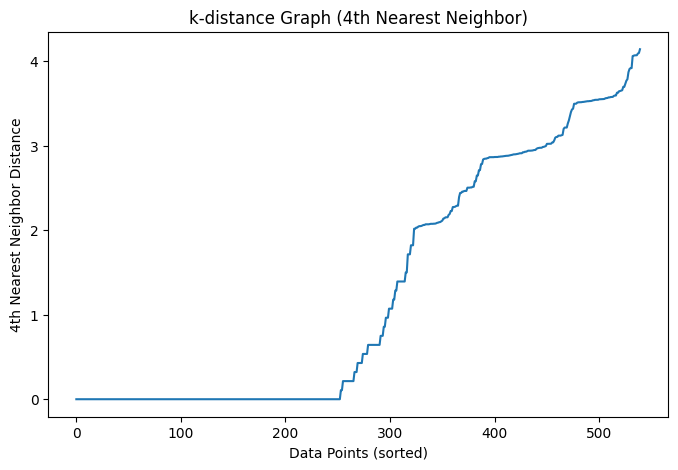

In [ ]:
# Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-distance Graph (4th Nearest Neighbor)')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()


**From manual interpetation, it was found that 3 is where the "elbow" or the sharp curve is formed**

**STEP 4: Find the optimal min_samples using grid search.**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# set paramters
best_eps = 3
best_min_samples = None
best_score = -1
min_samples_range = range(3, 15)


# Loop through the minumum samples from 3 to 15
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)

    # Ignore configurations with a single cluster or all noise
    if len(np.unique(labels)) > 1 and -1 in np.unique(labels):
        score = silhouette_score(data_scaled, labels)
        if score > best_score:
            best_score = score
            best_min_samples = min_samples

print(f"Optimal min_samples: {best_min_samples}, Best silhouette score: {best_score}")


Optimal min_samples: 8, Best silhouette score: 0.2368491396657768


**STEP 5: Apply DBSCAN with an eps of 3 and min_samples of 8**

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np


data = pd.read_csv('/content/gdrive/MyDrive/Datasets/1_nrml_b.csv')

# Standardize the features as done earlier
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['LUNG_CANCER'], errors='ignore'))

# Applying DBSCAN with best parameters obtained
dbscan = DBSCAN(eps=3, min_samples=8)
labels = dbscan.fit_predict(data_scaled)

# Analyzing the results
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_summary = pd.DataFrame({'Cluster': unique_labels, 'Counts': counts})
print(cluster_summary)



    Cluster  Counts
0        -1     112
1         0     134
2         1      41
3         2      12
4         3      20
5         4      28
6         5      55
7         6      23
8         7      81
9         8       8
10        9       9
11       10       9
12       11       8


**Visualize the DBSCAN clustering**

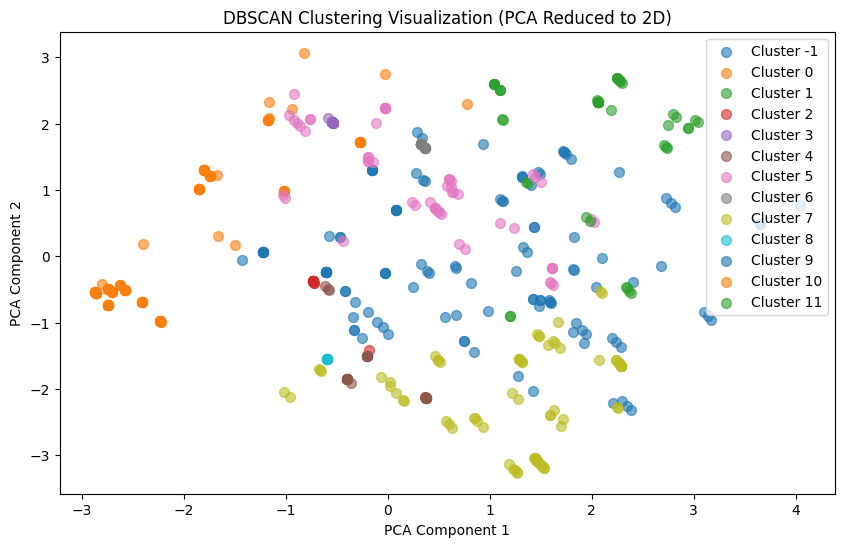

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data dimensionality to 2 components and plot clusters
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)
plt.figure(figsize=(10, 6))
for cluster in unique_labels:
    plt.scatter(data_2d[labels == cluster, 0], data_2d[labels == cluster, 1], label=f'Cluster {cluster}', s=50, alpha=0.6)
plt.title('DBSCAN Clustering Visualization (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


**Current setting of eps =3 and min samples = 8 resulted in 11 scattered clusters. Noise points in cluster -1 (outliers) indicate rare patient cases.
For data preprocessing, outliers can either be removed if they are considered noise or isolated by creating a seperate feature that indicates whether a data point is an outlier. this can be used as an input feature to highlight data anomalies.**

**DATASET 2**

**STEP 1 AND 2 (INTIALIZING CONNECTION TO GOOGLE DRIVE, PROVIDING A FILE PATH) WERE DONE UNDER DATASET 1 SECTION TO AVOID REPETABILITY**

**STEP 3:**

**Application of princple component analysis**

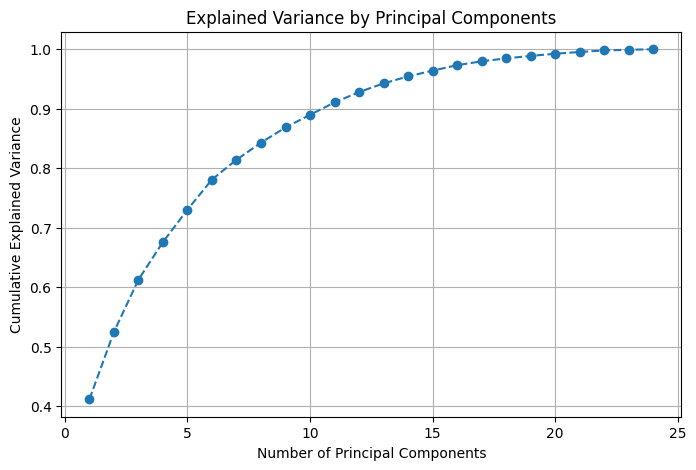

14

In [ ]:

file_path = '/content/gdrive/MyDrive/Datasets/2_nrml.csv'
data = pd.read_csv(file_path)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardizing the features as done earlier
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Performing PCA as done earlier
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Plotting the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determining the number of components to retain 95% of variance
components_to_keep = (explained_variance_ratio >= 0.95).argmax() + 1
components_to_keep


**in this graph, the Y-axis represents the cumlative explained variance which tells the total amount of variance captured by the first n principle components whereas the x-axis represents the number of principle components. the graph shows that around 15 components around 90-95 % of the variance is being captured. this means that the usage of 15 components instead of 24 would retain most of the important information while reducing the number of dimentions.**

**STEP 4: Apply PCA to reduce the amOunt of components in the dataset to 15 and save the newly generated dataset as 2_red_nrml.csv**

In [ ]:
# Applying PCA with 15 components and saving the reduced dataset
pca = PCA(n_components=15)
data_reduced = pca.fit_transform(data_scaled)
save_path = '/content/gdrive/MyDrive/Datasets//2_reduced_nrml.csv'
pd.DataFrame(data_reduced).to_csv(save_path, index=False)





**STEP 5: Produce a k-distance graph to find the optimal eps value**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('/content/gdrive/MyDrive/Datasets/2_reduced_nrml.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['LUNG_CANCER'], errors='ignore'))

# Using k-nearest neighbors to find distances to the 4th nearest neighbor as done earlier
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort distances
distances = np.sort(distances[:, 4], axis=0)


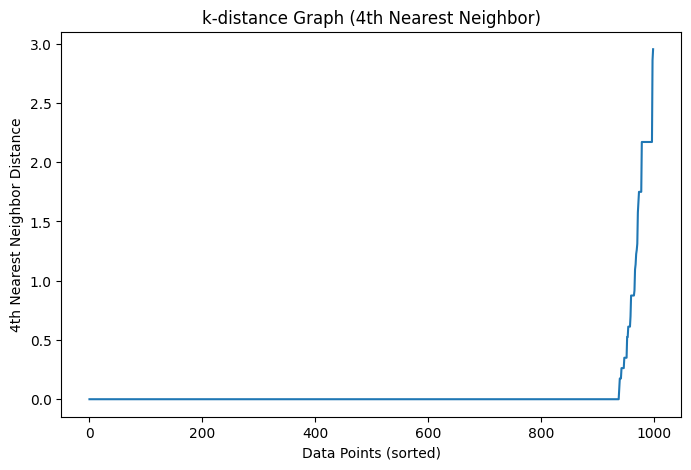

In [ ]:
# Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-distance Graph (4th Nearest Neighbor)')
plt.xlabel('Data Points (sorted)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()


**Graph suggests the usage of eps = 2**

**Finding appropriate min_samples using Rule of Thumb based on dimensionality**

In [ ]:
min_samples_value = 2 * data.shape[1]
print(min_samples_value)
 # data.shape[1] gives the number of features (columns)


30


**STEP 6: Applying DBSCAN Clustering algorithm.**

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


file_path = '/content/gdrive/MyDrive/Datasets/2_reduced_nrml.csv'
data = pd.read_csv(file_path)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Applying DBSCAN with chosen parameters
eps_value = 2.3
min_samples_value = 30
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(data_scaled)

# Analyzing the results
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_summary = pd.DataFrame({'Cluster': unique_labels, 'Counts': counts})
print(cluster_summary)


    Cluster  Counts
0        -1     459
1         0      70
2         1      39
3         2      60
4         3      31
5         4      40
6         5      30
7         6      30
8         7      70
9         8      50
10        9      50
11       10      30
12       11      41


**Visualizations of DBSCAN**

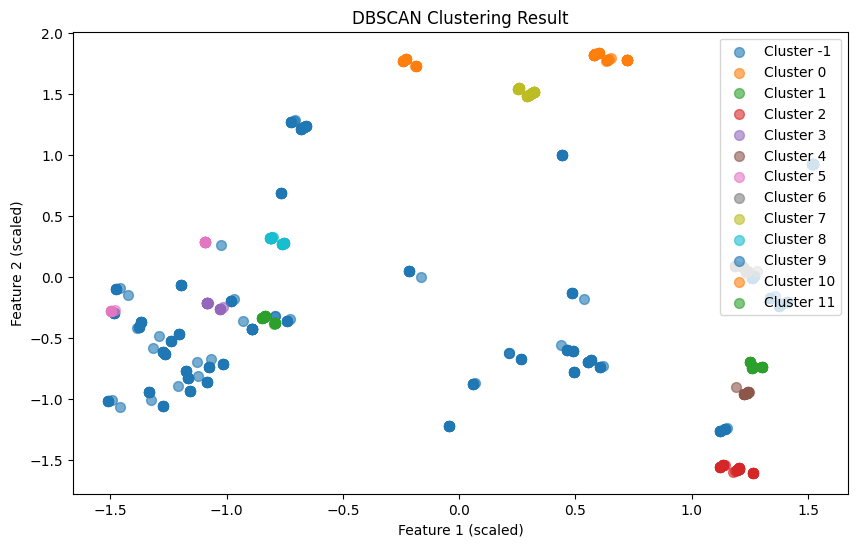

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the clusters based on dimensionality reduction
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(labels)
for cluster in unique_clusters:
    plt.scatter(data_scaled[labels == cluster, 0], data_scaled[labels == cluster, 1], label=f'Cluster {cluster}', s=50, alpha=0.6)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(loc='upper right')
plt.show()


**the cluster graph suggests that there are distinct groups within the data, these groups can provide insights in natural patterns. the presence of low number of noise suggests that the majority of points form coherent structures.**